<a href="https://colab.research.google.com/github/Nitesh2206/python-kernels/blob/master/keras_tf2_digit_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# Connect to kaggle datasets
import os
os.environ['KAGGLE_USERNAME'] = "nitesh2206" # username from the json file 
os.environ['KAGGLE_KEY'] = "sscc" 
!kaggle competitions download -c digit-recognizer

train_data = pd.read_csv("../content/train.csv")
test_data = pd.read_csv("../content/test.csv")
(train_data.shape,test_data.shape)

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


((42000, 785), (28000, 784))

In [0]:
# get data from mnist and combine both training and test data
data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
mnist_train_images = np.concatenate((train_images, test_images))
mnist_train_labels = np.concatenate((train_labels, test_labels))
(mnist_train_images.shape,mnist_train_labels.shape)

((70000, 28, 28), (70000,))

In [0]:
# combine data from mnist and competition training for bigger training set
x = np.array(train_data.drop(['label'], axis = 1))
y = np.array(train_data['label'])
test_data = np.array(test_data)

x = x.reshape((x.shape[0], 28, 28))
test_data = test_data.reshape(test_data.shape[0], 28, 28)

x = np.concatenate((x, mnist_train_images))
y = np.concatenate((y, mnist_train_labels))

x = x/255.0
test_data = test_data/255.0

print(x.shape, y.shape, test_data.shape)

(112000, 28, 28) (112000,) (28000, 28, 28)


In [0]:
# split to training and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, shuffle = True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100800, 28, 28) (100800,) (11200, 28, 28) (11200,)


In [0]:
# create the model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation="relu"),
                          keras.layers.Dense(10,activation="softmax")
])

In [0]:
# add optimzer and loss function
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [0]:
model.fit(x_train,y_train,epochs=30)

Train on 100800 samples
Epoch 1/30
100800/100800 [==============================] - 9s 91us/sample - loss: 0.1944 - acc: 0.9438
Epoch 2/30
100800/100800 [==============================] - 9s 89us/sample - loss: 0.0752 - acc: 0.9772
Epoch 3/30
100800/100800 [==============================] - 9s 89us/sample - loss: 0.0486 - acc: 0.9847
Epoch 4/30
100800/100800 [==============================] - 9s 89us/sample - loss: 0.0335 - acc: 0.9898
Epoch 5/30
100800/100800 [==============================] - 9s 93us/sample - loss: 0.0244 - acc: 0.9925
Epoch 6/30
100800/100800 [==============================] - 9s 92us/sample - loss: 0.0192 - acc: 0.9940
Epoch 7/30
100800/100800 [==============================] - 9s 89us/sample - loss: 0.0148 - acc: 0.9955
Epoch 8/30
100800/100800 [==============================] - 9s 91us/sample - loss: 0.0127 - acc: 0.9958
Epoch 9/30
100800/100800 [==============================] - 9s 89us/sample - loss: 0.0104 - acc: 0.9967
Epoch 10/30
100800/100800 [=============

In [0]:
prediction = model.predict(x_test)

In [0]:
prediction_classes = model.predict_classes(x_test)
test_data.shape

(28000, 28, 28)

In [0]:
# Accuracy for validation set
accuracy_score(y_test,prediction_classes )

0.9916071428571429

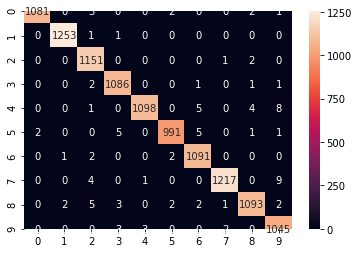

In [0]:
c_mtx = confusion_matrix(y_test,prediction_classes )
sns.heatmap(c_mtx, annot=True, fmt='d')

In [0]:
#create submission.csv for kaggle 
sub_prediction = model.predict_classes(test_data)
sub_prediction = pd.Series(sub_prediction, name = 'Label')
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), sub_prediction], axis = 1)
submission.to_csv('Submission.csv', index = False)


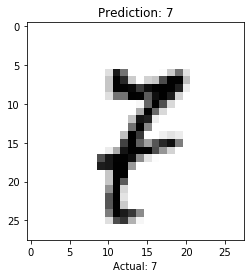

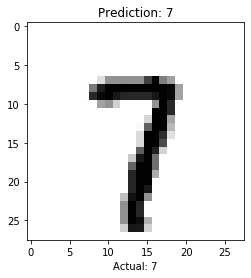

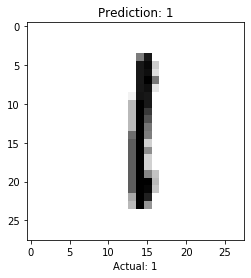

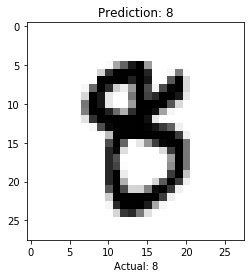

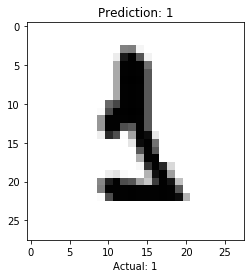

In [0]:
# Prediction vs Actual
for i in range(5):
  plt.grid(False)
  plt.imshow((x_test[i]),cmap=plt.cm.binary)
  plt.xlabel("Actual: " + str(y_test[i]))
  plt.title("Prediction: " + str(prediction_classes[i]))
  plt.show()